In [1]:
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import HuggingFaceHub
from langchain_classic.chains import LLMChain

from langchain_core.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEndpoint
from langchain_classic.chains import LLMChain




In [2]:
import os 
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "key"



TEXT TO TEXT GENERATION

In [3]:
prompt = PromptTemplate(
    input_variables=['product'],
    template="What is a good name for a company that makes {product}"
)


In [4]:
llm = HuggingFaceEndpoint(
    repo_id="google/flan-t5-large",
    task="text2text-generation",
    temperature=0
)

chain = LLMChain(prompt=prompt, llm=llm)


C:\Users\aksha\AppData\Local\Temp\ipykernel_10296\302999548.py:7: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use `RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=llm)


In [5]:
chain.run("shoes")


C:\Users\aksha\AppData\Local\Temp\ipykernel_10296\102961533.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  chain.run("shoes")


StopIteration: 

In [10]:
from langchain_core.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEndpoint

prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}"
)

llm = HuggingFaceEndpoint(
    repo_id="google/flan-t5-large",
    task="text2text-generation",
    temperature=0,
    provider="hf-inference"   # 🔥 THIS FIXES StopIteration
)

chain = prompt | llm


In [11]:
chain.invoke({"product": "shoes"})


ValueError: Model 'google/flan-t5-large' doesn't support task 'text-generation'. Supported tasks: 'None', got: 'text-generation'

In [12]:
from langchain_core.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEndpoint

prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?"
)

llm = HuggingFaceEndpoint(
    repo_id="google/gemma-2b-it",
    task="text-generation",
    temperature=0.7,
    provider="hf-inference"
)

chain = prompt | llm

chain.invoke({"product": "shoes"})


HfHubHTTPError: (Request ID: Root=1-6949a57f-1dfe60b12d6ae8717d30d343;e6ecda70-0508-4cfb-ab8b-e5d544da2065)

403 Forbidden: This authentication method does not have sufficient permissions to call Inference Providers on behalf of user akshattjain.
Cannot access content at: https://router.huggingface.co/hf-inference/models/google/gemma-2b-it.
Make sure your token has the correct permissions.

HUGGING FACE IS PAID NOW 

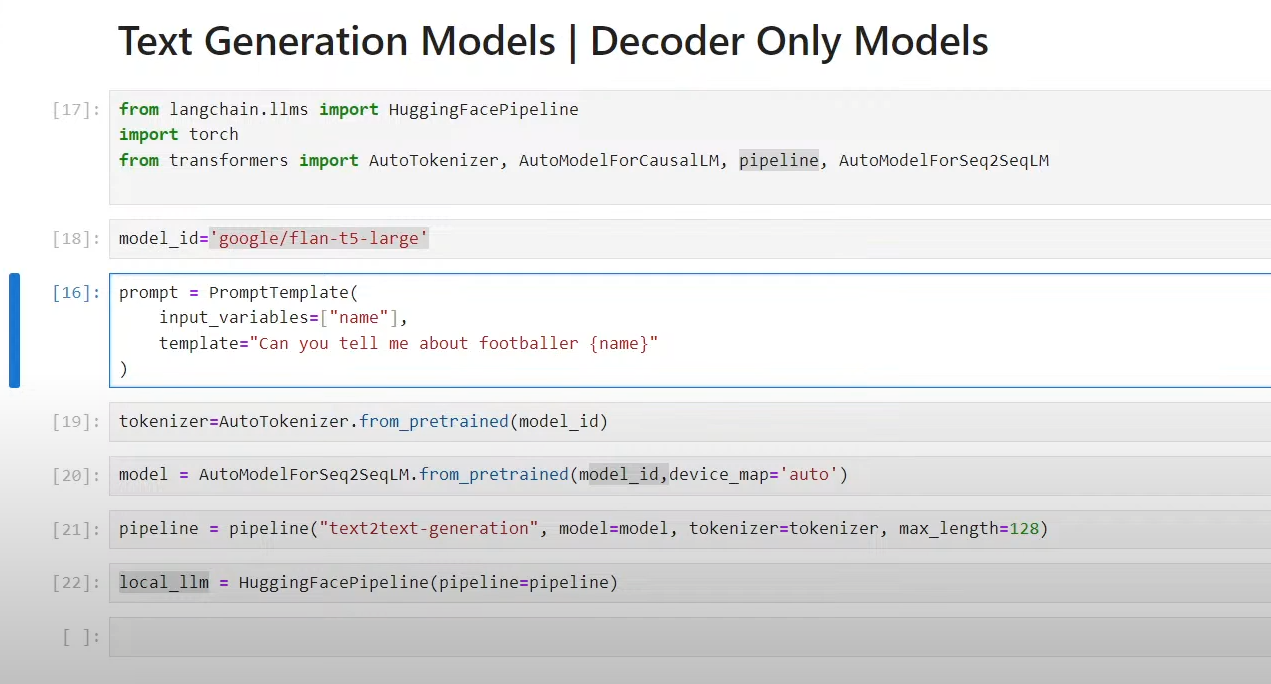